In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_85443/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
drinks = pd.read_csv('../../csv/drinks.csv')

In [4]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [5]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [6]:
drinks.isnull().sum() # isna()와 동일

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [7]:
flag = drinks['continent'].isna()
drinks.loc[flag, ]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [8]:
# 결측치가 포함된 데이터프레임 확인
flag2 = drinks.isna().any(axis=1) # true가 하나라도 있으면 true
drinks.loc[~flag2, ] # ~ : 비트연산 (-도 가능)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [9]:
# 결측치 대체
drinks['continent'] = drinks['continent'].fillna('OT')

In [10]:
drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [11]:
drinks.columns = ['국가','맥주소비량','위스키소비량','와인소비량','도수','대륙']

In [12]:
drinks

,국가,맥주소비량,위스키소비량,와인소비량,도수,대륙
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [13]:
group_data = drinks[['맥주소비량','대륙']].groupby('대륙').agg(['mean', 'min','max','sum'])

In [14]:
drinks[['맥주소비량','대륙']].groupby('대륙').describe()

맥주소비량                                                           
   count        mean        std   min     25%    50%     75%    max
대륙                                                                 
AF  53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0
AS  44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0
EU  45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0
OC  16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0
OT  23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0
SA  12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0

In [15]:
group_data

맥주소비량               
          mean min  max   sum
대륙                           
AF   61.471698   0  376  3258
AS   37.045455   0  247  1630
EU  193.777778   0  361  8720
OC   89.687500   0  306  1435
OT  145.434783   1  285  3345
SA  175.083333  93  333  2101

In [16]:
group_data['맥주소비량']['mean']

대륙
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: mean, dtype: float64

In [17]:
mean_data = drinks['도수'].mean()

In [18]:
mean_data

4.717098445595855

In [19]:
group_data2 = drinks[['대륙','도수']].groupby('대륙').mean()

In [22]:
flag3 = group_data2['도수'] > mean_data # series형태로 연산하면 series, []없이 하면 데이터프레임

In [23]:
group_data2.loc[flag3, ]

,도수
대륙,
EU,8.617778
OT,5.995652
SA,6.308333


In [26]:
drinks['총 술 소비량'] = drinks['맥주소비량'] + drinks['위스키소비량'] + drinks['와인소비량']
drinks

,국가,맥주소비량,위스키소비량,와인소비량,도수,대륙,총 소비량,총 술 소비량
0,Afghanistan,0,0,0,0.0,AS,0,0
1,Albania,89,132,54,4.9,EU,275,275
2,Algeria,25,0,14,0.7,AF,39,39
3,Andorra,245,138,312,12.4,EU,695,695
4,Angola,217,57,45,5.9,AF,319,319
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,436
189,Vietnam,111,2,1,2.0,AS,114,114
190,Yemen,6,0,0,0.1,AS,6,6
191,Zambia,32,19,4,2.5,AF,55,55


In [28]:
drinks.drop(
    columns='총 소비량',
    inplace=True
)

In [30]:
drinks.sort_values('총 술 소비량', ascending=False, inplace=True)

In [32]:
# 인덱스 초기화
drinks.reset_index(drop=True, inplace=True)

In [45]:
flag4 = drinks['국가'] == 'South Korea'
drinks.loc[flag4, ]
    

,국가,맥주소비량,위스키소비량,와인소비량,도수,대륙,총 술 소비량
98,South Korea,140,16,9,9.8,AS,165


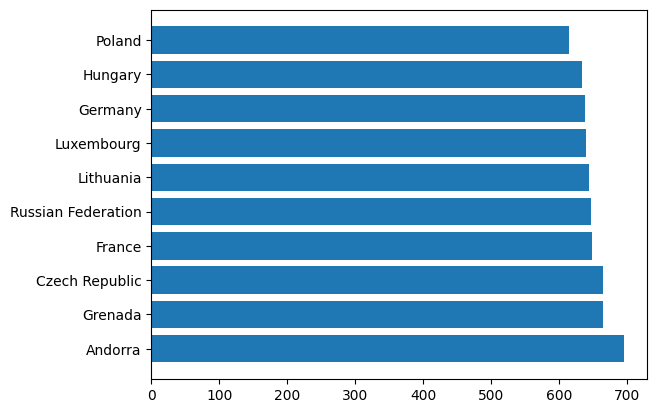

In [41]:
# 총 술 소비량 상위 10위까지 시각화
x = drinks['국가'].head(10)
y = drinks['총 술 소비량'].head(10)

plt.barh(x,y)
plt.show()

/opt/homebrew/lib/python3.11/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/opt/homebrew/lib/python3.11/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/opt/homebrew/lib/python3.11/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


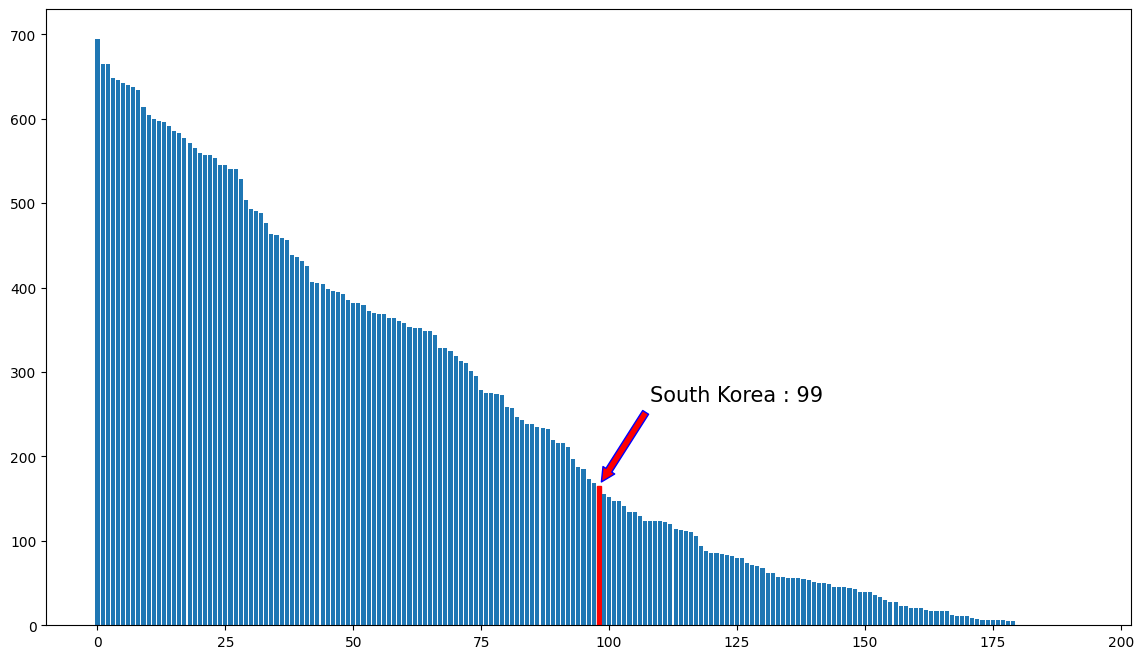

In [55]:
x = drinks.index
y = drinks['총 술 소비량']

korea_index = drinks.loc[drinks['국가'] == 'South Korea', ].index[0]
korea_total = drinks.loc[drinks['국가'] == 'South Korea', '총 술 소비량']

# 그래프 사이즈 조절
plt.figure(figsize=(14,8))

bar_list = plt.bar(x, y)

bar_list[korea_index].set_color('red') # 그래프 중 한국

# 주석
plt.annotate(
    f'South Korea : {korea_index + 1}',
    xy = (korea_index, korea_total), # 어디를 지정할지
    xytext = (korea_index + 10, korea_total + 100),
    fontsize = 15,
    arrowprops = {
        'facecolor' : 'r', # 화살표 내부 색 지정
        'edgecolor' : 'b', # 화살표 외곽선 색
        'headwidth' : 10, # 화살표 머리의 너비
        'headlength' : 10, # 화살표 머리 길이
        'width' : 5, # 화살표 꼬리 너비
        'shrink' : 0.05 # 화살표와 주석 사이의 간격

    }

)

plt.show()

In [58]:
drinks.sort_values('도수', ascending=False, inplace=True)

In [60]:
drinks.reset_index(drop=True,inplace=True)

/opt/homebrew/lib/python3.11/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/opt/homebrew/lib/python3.11/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/opt/homebrew/lib/python3.11/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


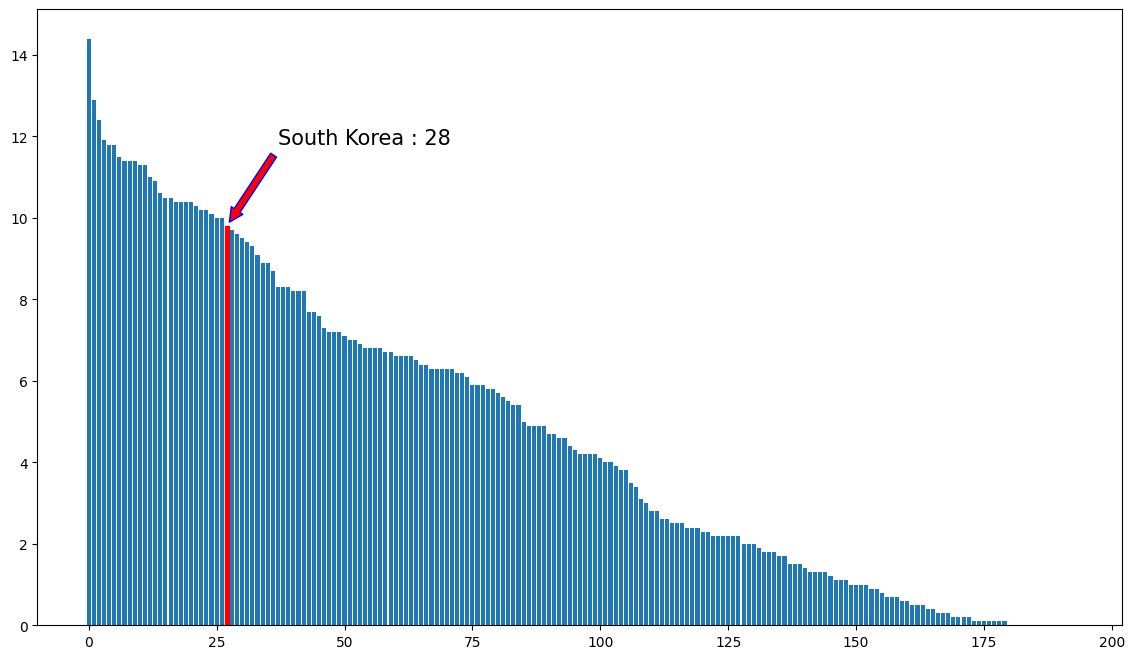

In [61]:
x = drinks.index
y = drinks['도수']

korea_index = drinks.loc[drinks['국가'] == 'South Korea', ].index[0]
korea_total = drinks.loc[drinks['국가'] == 'South Korea', '도수']

# 그래프 사이즈 조절
plt.figure(figsize=(14,8))

bar_list = plt.bar(x, y)

bar_list[korea_index].set_color('red') # 그래프 중 한국

# 주석
plt.annotate(
    f'South Korea : {korea_index + 1}',
    xy = (korea_index, korea_total), # 어디를 지정할지
    xytext = (korea_index + 10, korea_total + 2),
    fontsize = 15,
    arrowprops = {
        'facecolor' : 'r', # 화살표 내부 색 지정
        'edgecolor' : 'b', # 화살표 외곽선 색
        'headwidth' : 10, # 화살표 머리의 너비
        'headlength' : 10, # 화살표 머리 길이
        'width' : 5, # 화살표 꼬리 너비
        'shrink' : 0.05 # 화살표와 주석 사이의 간격

    }

)

plt.show()